In [1038]:
import pandas as pd
# reading in the csv
crime_statistics = pd.read_csv("datasets/UK Census/CrimeByTownUk.csv").copy()
population_statistics = pd.read_csv("datasets/UK Census/PopulationByTownUk.csv").copy()
education_statistics = pd.read_csv("datasets/UK Census/EducationQualityByAreaOfstedReport.csv").copy()

In [1039]:
# rename the crime Local Authority name column to Local authority area so i can key the columns together 
crime_statistics.rename(columns={"Local Authority\n name": "Local authority area"}, inplace=True)
population_statistics.rename(columns={"Local Authority name": "Local authority area"}, inplace=True)

In [1040]:
# merge the two datasets together based on the area name
education_and_crime_statistics = pd.merge(crime_statistics, education_statistics, on="Local authority area")
education_and_crime_and_population_statistics = pd.merge(education_and_crime_statistics, population_statistics, on="Local authority area")
education_and_crime_and_population_statistics

,Police Force Area\n code,Police Force Area\n name,Community Safety\n Partnership code,Community Safety\n Partnership name,Local Authority\n code,Local authority area,Total recorded crime\n (excluding fraud),Violence against\n the person,Homicide,Death or serious\n injury caused by\n illegal driving,...,Provision type,Sector,Deprivation index,Overall effectiveness,Outcomes in education and related learning activities,How well children and young people are helped and protected,The effectiveness of leaders and managers,Health services,Population figures (mid-2021) - rounded to 100,Household figures (mid-2020) - rounded to 100
0,E23000036,Avon and Somerset,E22000001,Bath and North East Somerset,E06000022,Bath and North East Somerset,12826.00,4752.00,1.00,0.00,...,Children's home,Private,Not available,3.0,9.0,3.0,3.0,9.0,192400.00,79400.00
1,E23000036,Avon and Somerset,E22000001,Bath and North East Somerset,E06000022,Bath and North East Somerset,12826.00,4752.00,1.00,0.00,...,Children's home,Voluntary,Not available,3.0,9.0,3.0,3.0,9.0,192400.00,79400.00
2,E23000036,Avon and Somerset,E22000001,Bath and North East Somerset,E06000022,Bath and North East Somerset,12826.00,4752.00,1.00,0.00,...,Residential Special School,Academy,Not available,1.0,9.0,2.0,1.0,9.0,192400.00,79400.00
3,E23000036,Avon and Somerset,E22000001,Bath and North East Somerset,E06000022,Bath and North East Somerset,12826.00,4752.00,1.00,0.00,...,Boarding School,Academy,Not available,4.0,9.0,4.0,4.0,9.0,192400.00,79400.00
4,E23000036,Avon and Somerset,E22000001,Bath and North East Somerset,E06000022,Bath and North East Somerset,12826.00,4752.00,1.00,0.00,...,Boarding School,Academy,Not available,2.0,9.0,3.0,2.0,9.0,192400.00,79400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8972,E23000038,Wiltshire,E22000361,Wiltshire,E06000054,Wiltshire,26380.00,11099.00,3.00,3.00,...,Children's home,Private,Not available,2.0,9.0,2.0,3.0,9.0,513400.00,214400.00
8973,E23000038,Wiltshire,E22000361,Wiltshire,E06000054,Wiltshire,26380.00,11099.00,3.00,3.00,...,Children's home,Private,Not available,2.0,9.0,2.0,2.0,9.0,513400.00,214400.00
8974,E23000038,Wiltshire,E22000361,Wiltshire,E06000054,Wiltshire,26380.00,11099.00,3.00,3.00,...,Further Education College with Residential Acc...,Voluntary,Not available,2.0,9.0,2.0,2.0,9.0,513400.00,214400.00
8975,E23000038,Wiltshire,E22000361,Wiltshire,E06000054,Wiltshire,26380.00,11099.00,3.00,3.00,...,Children's home,Private,Not available,3.0,9.0,3.0,3.0,9.0,513400.00,214400.00


In [1041]:
# remove all rows with values that are null
education_and_crime_and_population_statistics = education_and_crime_and_population_statistics[education_and_crime_and_population_statistics['Local authority area'].notna()]
education_and_crime_and_population_statistics = education_and_crime_and_population_statistics[education_and_crime_and_population_statistics['Overall effectiveness'].notna()]
education_and_crime_and_population_statistics = education_and_crime_and_population_statistics.drop(education_and_crime_and_population_statistics[education_and_crime_and_population_statistics['Total recorded crime\n (excluding fraud)'] == '[x]'].index)

In [1042]:
# remove columns that aren't needed
education_and_crime_and_population_statistics = education_and_crime_and_population_statistics.drop(columns=['Police Force Area\n code', 'Police Force Area\n name', 'Community Safety\n Partnership code', 'Community Safety\n Partnership name', 'Local Authority\n code', 'URN', 'Five-Year Ofsted Inspection Data publish date', 'Publication type', 'Remit', 'As at date', 'Published date', 'Government office region', 'Constituency', 'Postcode', 'Provider type', 'Provision type', 'Sector', 'Deprivation index', 'Outcomes in education and related learning activities', 'Health services', 'Name', 'Homicide', 'Death or serious\n injury caused by\n illegal driving', 'Violence with injury', 'Stalking and harassment', 'Sexual offences', 'Robbery', 'Theft offences', 'Burglary', 'Residential burglary', 'Non-residential burglary', 'Vehicle offences', 'Bicycle theft', 'Shoplifting', 'All other theft offences', 'Drug offences', 'Possession of weapons offences', 'Miscellaneous crimes against society', 'The effectiveness of leaders and managers', 'Violence without injury', 'Theft from the person'], axis=1)

In [1043]:
education_and_crime_and_population_statistics

,Local authority area,Total recorded crime\n (excluding fraud),Violence against\n the person,Criminal damage and arson,Drug offences,Public order offences,Overall effectiveness,How well children and young people are helped and protected,Population figures (mid-2021) - rounded to 100,Household figures (mid-2020) - rounded to 100
0,Bath and North East Somerset,12826.00,4752.00,1311.00,227.00,1754.00,3.0,3.0,192400.00,79400.00
1,Bath and North East Somerset,12826.00,4752.00,1311.00,227.00,1754.00,3.0,3.0,192400.00,79400.00
2,Bath and North East Somerset,12826.00,4752.00,1311.00,227.00,1754.00,1.0,2.0,192400.00,79400.00
3,Bath and North East Somerset,12826.00,4752.00,1311.00,227.00,1754.00,4.0,4.0,192400.00,79400.00
4,Bath and North East Somerset,12826.00,4752.00,1311.00,227.00,1754.00,2.0,3.0,192400.00,79400.00
...,...,...,...,...,...,...,...,...,...,...
8971,Wiltshire,26380.00,11099.00,3533.00,628.00,2426.00,2.0,3.0,513400.00,214400.00
8972,Wiltshire,26380.00,11099.00,3533.00,628.00,2426.00,2.0,2.0,513400.00,214400.00
8973,Wiltshire,26380.00,11099.00,3533.00,628.00,2426.00,2.0,2.0,513400.00,214400.00
8974,Wiltshire,26380.00,11099.00,3533.00,628.00,2426.00,2.0,2.0,513400.00,214400.00


array([[<Axes: title={'center': 'Overall effectiveness'}>,
        <Axes: title={'center': 'How well children and young people are helped and protected'}>]],
      dtype=object)

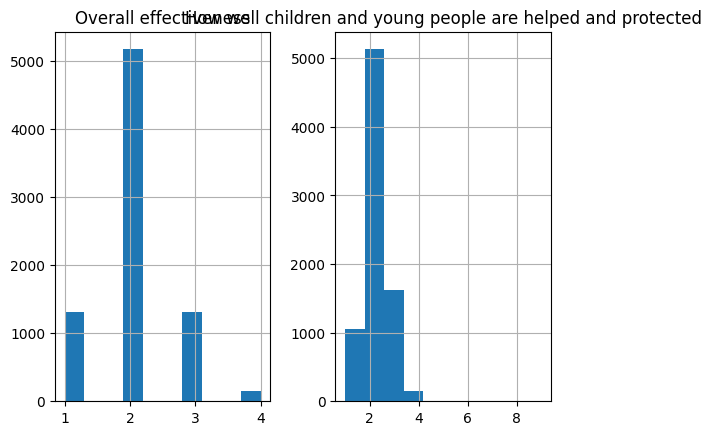

In [1044]:
education_and_crime_and_population_statistics.hist()

In [1045]:
current_name = education_and_crime_and_population_statistics["Local authority area"][0]
count = 0
running_effectiveness_total = 0
running_protection_total = 0
area_to_education_and_crime = {"Place" : [],
                               "Education Effectiveness" : [],
                               "Total Crime" : [],
                               "Violent Crime": [],
                               "Student Protection": [],
                               "Population": [],
                               "Arson": [],
                               "Public Offences": []}
for index, row in education_and_crime_and_population_statistics.iterrows():
  if current_name == row["Local authority area"]:
   count += 1
   running_effectiveness_total += row["Overall effectiveness"]
   running_protection_total += row["How well children and young people are helped and protected"]
  else:
   area_to_education_and_crime["Place"].append(row["Local authority area"])
   area_to_education_and_crime["Education Effectiveness"].append(running_effectiveness_total)
   area_to_education_and_crime["Total Crime"].append(row["Total recorded crime\n (excluding fraud)"])
   area_to_education_and_crime["Violent Crime"].append(row["Violence against\n the person"])
   area_to_education_and_crime["Student Protection"].append(running_protection_total)
   area_to_education_and_crime["Population"].append(row["Population figures (mid-2021) - rounded to 100"])
   area_to_education_and_crime["Arson"].append(row["Criminal damage and arson"])
   area_to_education_and_crime["Public Offences"].append(row["Public order offences"])
   running_effectiveness_total = 0
   running_protection_total = 0
   count = 0
  current_name = row["Local authority area"]

In [1046]:
average_crime_and_education = pd.DataFrame(area_to_education_and_crime, columns=['Place', 'Education Effectiveness', 'Total Crime', 'Violent Crime', 'Student Protection', 'Population', 'Arson', 'Public Offences'])  
average_crime_and_education = average_crime_and_education.set_index('Place')   
average_crime_and_education

,Education Effectiveness,Total Crime,Violent Crime,Student Protection,Population,Arson,Public Offences,Drug Offences
Place,,,,,,,,
North Somerset,45.0,15321.00,6436.00,49.0,217400.00,1608.00,2205.00,367.00
South Gloucestershire,47.0,17604.00,6633.00,46.0,290700.00,1642.00,2245.00,356.00
Bedford,74.0,15343.00,5666.00,77.0,185800.00,1448.00,1606.00,530.00
Central Bedfordshire,127.0,15908.00,5453.00,128.0,295500.00,1623.00,1663.00,326.00
Luton,149.0,19908.00,7537.00,157.0,224800.00,1684.00,2150.00,864.00
...,...,...,...,...,...,...,...,...
Kirklees,255.0,46438.00,20823.00,259.0,433400.00,4431.00,7133.00,1152.00
Leeds,296.0,110741.00,43893.00,299.0,809000.00,10380.00,15149.00,2977.00
Wakefield,251.0,45885.00,19317.00,258.0,353800.00,4242.00,6483.00,1057.00


<Axes: >

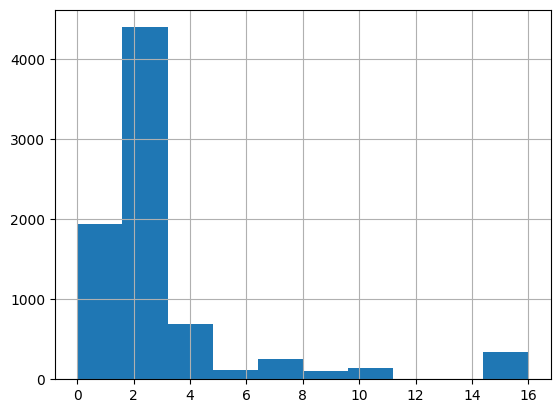

In [1047]:
import numpy as np
education_and_crime_and_population_statistics["Crime Level"] = pd.cut(education_and_crime_and_population_statistics["Total recorded crime\n (excluding fraud)"].astype(float),
 bins=[0., 10000., 20000., 30000., 40000., 50000., 60000., 70000., 80000., 90000., 100000., 110000., 120000., 130000., 140000., 150000., 160000., np.inf],
 labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

education_and_crime_and_population_statistics["Crime Level"].hist()

<Axes: >

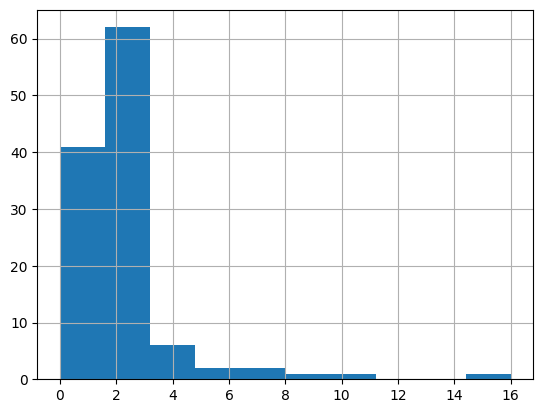

In [1048]:
average_crime_and_education["Crime Level"] = pd.cut(average_crime_and_education["Total Crime"].astype(float),
 bins=[0., 10000., 20000., 30000., 40000., 50000., 60000., 70000., 80000., 90000., 100000., 110000., 120000., 130000., 140000., 150000., 160000., np.inf],
 labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

average_crime_and_education["Crime Level"].hist()

In [1049]:
average_crime_and_education["Crime By Population"] = average_crime_and_education["Total Crime"].astype(float) / average_crime_and_education["Population"].astype(float) 

In [1050]:
average_crime_and_education

,Education Effectiveness,Total Crime,Violent Crime,Student Protection,Population,Arson,Public Offences,Drug Offences,Crime Level,Crime By Population
Place,,,,,,,,,,
North Somerset,45.0,15321.00,6436.00,49.0,217400.00,1608.00,2205.00,367.00,1,0.070474
South Gloucestershire,47.0,17604.00,6633.00,46.0,290700.00,1642.00,2245.00,356.00,1,0.060557
Bedford,74.0,15343.00,5666.00,77.0,185800.00,1448.00,1606.00,530.00,1,0.082578
Central Bedfordshire,127.0,15908.00,5453.00,128.0,295500.00,1623.00,1663.00,326.00,1,0.053834
Luton,149.0,19908.00,7537.00,157.0,224800.00,1684.00,2150.00,864.00,1,0.088559
...,...,...,...,...,...,...,...,...,...,...
Kirklees,255.0,46438.00,20823.00,259.0,433400.00,4431.00,7133.00,1152.00,4,0.107148
Leeds,296.0,110741.00,43893.00,299.0,809000.00,10380.00,15149.00,2977.00,11,0.136886
Wakefield,251.0,45885.00,19317.00,258.0,353800.00,4242.00,6483.00,1057.00,4,0.129692


In [1051]:
from sklearn import linear_model
import matplotlib.pyplot as plt

x = average_crime_and_education["Education Effectiveness"].values.astype(float)
y = average_crime_and_education["Public Offences"].values.astype(float)

In [1052]:
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

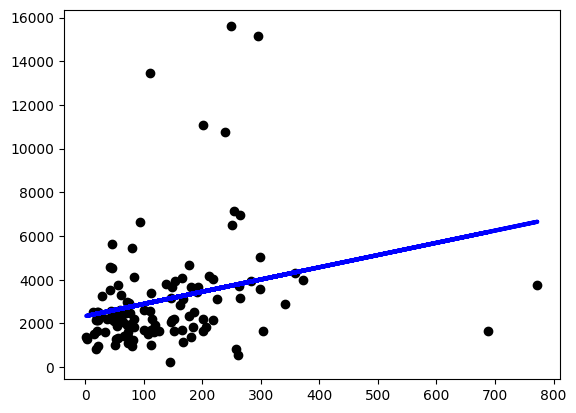

In [1053]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()

In [1054]:
corr_matrix = average_crime_and_education.corr()
corr_matrix["Education Effectiveness"].sort_values(ascending=False)

Education Effectiveness    1.000000
Student Protection         0.999212
Public Offences            0.259359
Violent Crime              0.248451
Arson                      0.220651
Crime Level                0.173281
Total Crime                0.168832
Crime By Population        0.128375
Population                 0.093655
Drug Offences              0.004350
Name: Education Effectiveness, dtype: float64